# **Melanoma Drug Discovery** 
[Melanoma](https://www.mayoclinic.org/diseases-conditions/melanoma/symptoms-causes/syc-20374884) is one of the most agressive skin cancers, it develops in melanocytes and it´s causes aren´t clear. 
UV exposure and age are both important factors to consider at the risk of developing melanoma.  

***Symptoms***

Melanoma commonly presents itself in the form of moles with unusual which are unsually pigmented or have an unusual-looking growth and shape, characterized by being irregular. 
**This can be detected by the ABCDE signs:**
1. *A is for asymmetrical shape*
2. *B is for irregular border*
3. *C is for changes in color*
4. *D is for diameter (usually larger than 1/4 inch)*
5. *E is for evolving*

## **ChEMBL Database**

The [ChEMBL Database](https://www.ebi.ac.uk/chembl/g/#search_results/all/query=melanoma) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications. [Data as of March 25, 2020; ChEMBL version 26].

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.5 MB/s 
     |████████████████████████████████| 596 kB 8.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


### **Seting up the environment**  

In [2]:
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 9.7 MB/s 


In [3]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-07-05 15:37:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   107MB/s    in 0.8s    

2022-07-05 15:37:58 (107 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [4]:
#Libraries to import
import pandas as pd 
from chembl_webresource_client.new_client import new_client
import polars as pl
import sys

In [5]:
#To copy the files to google drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [6]:
!mkdir /content/gdrive/MyDrive/Python/Portfolio

mkdir: cannot create directory ‘/content/gdrive/MyDrive/Python/Portfolio’: File exists


In [7]:
sys.path.append('/usr/local/lib/python3.9/site-packages/')

### **Target protein**
Mitogen-activated protein kinase kinase or MEK is protein that works together with the BRAF genes, which have correlated with the generation of melanoma, its inhibition produces apoptits inducing cell death, which can lead to melanoma treatment drugs.
 

In [8]:
target = new_client.target
target_query = target.search('MEK')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q13163', 'xref_name': None, 'xre...",Homo sapiens,Dual specificity mitogen-activated protein kin...,9.0,False,CHEMBL4948,"[{'accession': 'Q13163', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q13233', 'xref_name': None, 'xre...",Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9.0,False,CHEMBL3956,"[{'accession': 'Q13233', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'Q92918', 'xref_name': None, 'xre...",Homo sapiens,Mitogen-activated protein kinase kinase kinase...,9.0,False,CHEMBL5749,"[{'accession': 'Q92918', 'component_descriptio...",SINGLE PROTEIN,9606
3,"[{'xref_id': 'Q99759', 'xref_name': None, 'xre...",Homo sapiens,Mitogen-activated protein kinase kinase kinase 3,9.0,False,CHEMBL5970,"[{'accession': 'Q99759', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'Q9Y2U5', 'xref_name': None, 'xre...",Homo sapiens,Mitogen-activated protein kinase kinase kinase 2,9.0,False,CHEMBL5914,"[{'accession': 'Q9Y2U5', 'component_descriptio...",SINGLE PROTEIN,9606
5,"[{'xref_id': 'Q6ZN16', 'xref_name': None, 'xre...",Homo sapiens,Mitogen-activated protein kinase kinase kinase 15,9.0,False,CHEMBL1163127,"[{'accession': 'Q6ZN16', 'component_descriptio...",SINGLE PROTEIN,9606
6,[],Homo sapiens,Dual specificity mitogen-activated protein kin...,9.0,False,CHEMBL2111289,"[{'accession': 'P36507', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Rattus norvegicus,Dual specificity mitogen-activated protein kin...,9.0,False,CHEMBL3430876,"[{'accession': 'Q01986', 'component_descriptio...",PROTEIN FAMILY,10116
8,[],Mus musculus,Dual specificity mitogen-activated protein kin...,9.0,False,CHEMBL3721303,"[{'accession': 'O09110', 'component_descriptio...",SINGLE PROTEIN,10090
9,[],Mus musculus,Dual specificity mitogen-activated protein kin...,9.0,False,CHEMBL3885565,"[{'accession': 'P31938', 'component_descriptio...",PROTEIN FAMILY,10090


In [9]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL3956'

In [10]:
activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target).filter(standard_type ='IC50')

In [11]:
df = pd.DataFrame.from_dict(res)

In [12]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,507382,[],CHEMBL709029,Inhibition of MEK-1 Kinase phosphorylation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,8.0
1,None,1608385,[],CHEMBL880238,Inhibitory concentration against Mitogen-activ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2,None,2144713,[],CHEMBL934583,Inhibition of MEKK,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,11000.0
3,None,2613495,[],CHEMBL1031537,Inhibition of MEKK1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,uM,UO_0000065,None,8.1
4,None,2924042,[],CHEMBL1041531,Inhibition of C-terminal FLAG-tagged MEKK1 by ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
5,None,2924043,[],CHEMBL1041531,Inhibition of C-terminal FLAG-tagged MEKK1 by ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
6,Not Active,3446229,[],CHEMBL1244369,Inhibition of MAP3K1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,None,None,None,None
7,None,7956236,[],CHEMBL1924899,Inhibition of C-terminus flag-tagged MEKK1 exp...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
8,None,10949933,[],CHEMBL2049465,Inhibition of C-terminus FLAG-tagged MEKK1 exp...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
9,None,12036432,[],CHEMBL2150267,Inhibition of C-terminal FLAG-tagged MEKK expr...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0


#### **Handling missing data**

In [13]:
#Eliminating the missing data
df2 = df[df.standard_value.notna()]
df2 = df[df.canonical_smiles.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,507382,[],CHEMBL709029,Inhibition of MEK-1 Kinase phosphorylation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,8.0
1,None,1608385,[],CHEMBL880238,Inhibitory concentration against Mitogen-activ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2,None,2144713,[],CHEMBL934583,Inhibition of MEKK,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,11000.0
3,None,2613495,[],CHEMBL1031537,Inhibition of MEKK1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,uM,UO_0000065,None,8.1
4,None,2924042,[],CHEMBL1041531,Inhibition of C-terminal FLAG-tagged MEKK1 by ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
5,None,2924043,[],CHEMBL1041531,Inhibition of C-terminal FLAG-tagged MEKK1 by ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
6,Not Active,3446229,[],CHEMBL1244369,Inhibition of MAP3K1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,None,None,None,None
7,None,7956236,[],CHEMBL1924899,Inhibition of C-terminus flag-tagged MEKK1 exp...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
8,None,10949933,[],CHEMBL2049465,Inhibition of C-terminus FLAG-tagged MEKK1 exp...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
9,None,12036432,[],CHEMBL2150267,Inhibition of C-terminal FLAG-tagged MEKK expr...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0


In [14]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,507382,[],CHEMBL709029,Inhibition of MEK-1 Kinase phosphorylation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,8.0
1,None,1608385,[],CHEMBL880238,Inhibitory concentration against Mitogen-activ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2,None,2144713,[],CHEMBL934583,Inhibition of MEKK,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,11000.0
3,None,2613495,[],CHEMBL1031537,Inhibition of MEKK1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,uM,UO_0000065,None,8.1
4,None,2924042,[],CHEMBL1041531,Inhibition of C-terminal FLAG-tagged MEKK1 by ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
5,None,2924043,[],CHEMBL1041531,Inhibition of C-terminal FLAG-tagged MEKK1 by ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
6,Not Active,3446229,[],CHEMBL1244369,Inhibition of MAP3K1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,None,None,None,None
7,None,7956236,[],CHEMBL1924899,Inhibition of C-terminus flag-tagged MEKK1 exp...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
8,None,10949933,[],CHEMBL2049465,Inhibition of C-terminus FLAG-tagged MEKK1 exp...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
9,None,12036432,[],CHEMBL2150267,Inhibition of C-terminal FLAG-tagged MEKK expr...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 1,9606,None,None,IC50,nM,UO_0000065,None,10000.0


In [15]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL318804,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...,8.0
1,CHEMBL363648,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,10000.0
2,CHEMBL259060,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,11000.0
3,CHEMBL516640,COc1ccc(-n2cnc3ccc(-c4nnc(SCc5cccc(C#N)c5)o4)c...,8100.0
4,CHEMBL574588,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1,10000.0
5,CHEMBL574613,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...,10000.0
6,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,None
7,CHEMBL1614725,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...,10000.0
8,CHEMBL2048912,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...,10000.0
9,CHEMBL2148053,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...,10000.0


#### **Preprocessing of the data to change labels**

In [16]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = pd.DataFrame(df[selection])
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL318804,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...,8.0
1,CHEMBL363648,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,10000.0
2,CHEMBL259060,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,11000.0
3,CHEMBL516640,COc1ccc(-n2cnc3ccc(-c4nnc(SCc5cccc(C#N)c5)o4)c...,8100.0
4,CHEMBL574588,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1,10000.0
5,CHEMBL574613,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...,10000.0
6,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,None
7,CHEMBL1614725,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...,10000.0
8,CHEMBL2048912,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...,10000.0
9,CHEMBL2148053,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...,10000.0


In [17]:
df3 = df3[df3.standard_value.notna()]

In [18]:
bioactivity_class = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [19]:
df3 = pd.concat([df3,pd.Series(bioactivity_class, name = 'class')], axis=1)

In [20]:
df3

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL318804,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...,8.0,active
1,CHEMBL363648,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,10000.0,inactive
2,CHEMBL259060,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,11000.0,inactive
3,CHEMBL516640,COc1ccc(-n2cnc3ccc(-c4nnc(SCc5cccc(C#N)c5)o4)c...,8100.0,intermediate
4,CHEMBL574588,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1,10000.0,inactive
5,CHEMBL574613,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...,10000.0,inactive
6,NaN,NaN,NaN,inactive
7,CHEMBL1614725,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...,10000.0,inactive
8,CHEMBL2048912,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...,10000.0,inactive
9,CHEMBL2148053,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...,10000.0,inactive


In [21]:
df3.to_csv('bioactivity_data.csv', index=False)

In [22]:
! cp bioactivity_data.csv '/content/gdrive/MyDrive/Python/Portfolio' 

### **Calculate Lipinski descriptors**

This will allow to verify the druglikeness, thanks to the following principles:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [23]:
from rdkit import Chem 
from rdkit.Chem import Descriptors, Lipinski

In [24]:
data = pd.read_csv('/content/gdrive/MyDrive/Python/Portfolio/MelanomaDrugAnalysis/Bioactivity_data.csv')

In [25]:
data

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL318804,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...,8.0,active
1,CHEMBL363648,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,10000.0,inactive
2,CHEMBL259060,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,11000.0,inactive
3,CHEMBL516640,COc1ccc(-n2cnc3ccc(-c4nnc(SCc5cccc(C#N)c5)o4)c...,8100.0,intermediate
4,CHEMBL574588,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1,10000.0,inactive
5,CHEMBL574613,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...,10000.0,inactive
6,NaN,NaN,NaN,inactive
7,CHEMBL1614725,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...,10000.0,inactive
8,CHEMBL2048912,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...,10000.0,inactive
9,CHEMBL2148053,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...,10000.0,inactive


In [26]:
df_no_smiles = data.drop(columns='canonical_smiles')
df_no_smiles = df_no_smiles[df_no_smiles.standard_value.notna()]

In [27]:
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL318804,8.0,active
1,CHEMBL363648,10000.0,inactive
2,CHEMBL259060,11000.0,inactive
3,CHEMBL516640,8100.0,intermediate
4,CHEMBL574588,10000.0,inactive
5,CHEMBL574613,10000.0,inactive
7,CHEMBL1614725,10000.0,inactive
8,CHEMBL2048912,10000.0,inactive
9,CHEMBL2148053,10000.0,inactive
10,CHEMBL2204532,10000.0,inactive


In [28]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [29]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL318804,8.0,active,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...
1,CHEMBL363648,10000.0,inactive,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...
2,CHEMBL259060,11000.0,inactive,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...
3,CHEMBL516640,8100.0,intermediate,COc1ccc(-n2cnc3ccc(-c4nnc(SCc5cccc(C#N)c5)o4)c...
4,CHEMBL574588,10000.0,inactive,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1
5,CHEMBL574613,10000.0,inactive,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...
6,NaN,NaN,NaN,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...
7,CHEMBL1614725,10000.0,inactive,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...
8,CHEMBL2048912,10000.0,inactive,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...
9,CHEMBL2148053,10000.0,inactive,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...


In [30]:
#Calculationg Lipinski descriptors to append aftewards to the original dataframe
import numpy as np
def Lip(smiles, verbose = False):
    moldata= []
    for el in smiles:
        mol=Chem.MolFromSmiles(el) 
        moldata.append(mol)    
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [31]:
cannonical = data.canonical_smiles.dropna()

In [32]:
dfLipinski = Lip(cannonical)

In [33]:
dfLipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,565.099,5.49788,1.0,10.0
1,399.519,5.99522,1.0,4.0
2,526.408,4.66940,0.0,6.0
3,439.500,5.24808,0.0,8.0
4,336.412,5.40562,0.0,3.0
5,350.439,5.79572,0.0,3.0
6,547.965,5.91660,3.0,7.0
7,522.034,5.08380,3.0,9.0
8,734.684,6.45512,3.0,10.0
9,579.057,6.53348,2.0,8.0


In [45]:
dfNew = pd.concat([data, dfLipinski], axis = 1)

In [47]:
dfNew = dfNew.dropna()

In [48]:
dfNew

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL318804,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...,8.0,active,565.099,5.49788,1.0,10.0
1,CHEMBL363648,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,10000.0,inactive,399.519,5.99522,1.0,4.0
2,CHEMBL259060,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,11000.0,inactive,526.408,4.66940,0.0,6.0
3,CHEMBL516640,COc1ccc(-n2cnc3ccc(-c4nnc(SCc5cccc(C#N)c5)o4)c...,8100.0,intermediate,439.500,5.24808,0.0,8.0
4,CHEMBL574588,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1,10000.0,inactive,336.412,5.40562,0.0,3.0
5,CHEMBL574613,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...,10000.0,inactive,350.439,5.79572,0.0,3.0
7,CHEMBL1614725,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...,10000.0,inactive,522.034,5.08380,3.0,9.0
8,CHEMBL2048912,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...,10000.0,inactive,734.684,6.45512,3.0,10.0
9,CHEMBL2148053,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...,10000.0,inactive,579.057,6.53348,2.0,8.0
10,CHEMBL2204532,CN(c1ccc(F)c(NC(=O)c2cccc(OC(C)(C)C#N)c2Cl)c1)...,10000.0,inactive,346.416,1.45030,2.0,7.0


In [49]:
dfNew.standard_value.describe()

count       21.000000
mean      9846.095238
std      13616.167871
min          8.000000
25%       1000.000000
50%      10000.000000
75%      10000.000000
max      66000.000000
Name: standard_value, dtype: float64

In [54]:
def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i >  50000:
          i =  50000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    return x

In [55]:
df_norm = norm_value(dfNew)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL318804,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...,active,565.099,5.49788,1.0,10.0,8.0
1,CHEMBL363648,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,inactive,399.519,5.99522,1.0,4.0,10000.0
2,CHEMBL259060,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,inactive,526.408,4.66940,0.0,6.0,11000.0
3,CHEMBL516640,COc1ccc(-n2cnc3ccc(-c4nnc(SCc5cccc(C#N)c5)o4)c...,intermediate,439.500,5.24808,0.0,8.0,8100.0
4,CHEMBL574588,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1,inactive,336.412,5.40562,0.0,3.0,10000.0
5,CHEMBL574613,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...,inactive,350.439,5.79572,0.0,3.0,10000.0
7,CHEMBL1614725,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...,inactive,522.034,5.08380,3.0,9.0,10000.0
8,CHEMBL2048912,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...,inactive,734.684,6.45512,3.0,10.0,10000.0
9,CHEMBL2148053,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...,inactive,579.057,6.53348,2.0,8.0,10000.0
10,CHEMBL2204532,CN(c1ccc(F)c(NC(=O)c2cccc(OC(C)(C)C#N)c2Cl)c1)...,inactive,346.416,1.45030,2.0,7.0,10000.0


In [56]:
#convert to -log(IC50) for eassier management of the data
def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i*(10**-5) # Converts nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    return x

In [57]:
df_final = pIC50(df_norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [58]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL318804,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...,active,565.099,5.49788,1.0,10.0,4.096910
1,CHEMBL363648,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,inactive,399.519,5.99522,1.0,4.0,1.000000
2,CHEMBL259060,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,inactive,526.408,4.66940,0.0,6.0,0.958607
3,CHEMBL516640,COc1ccc(-n2cnc3ccc(-c4nnc(SCc5cccc(C#N)c5)o4)c...,intermediate,439.500,5.24808,0.0,8.0,1.091515
4,CHEMBL574588,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1,inactive,336.412,5.40562,0.0,3.0,1.000000
5,CHEMBL574613,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...,inactive,350.439,5.79572,0.0,3.0,1.000000
7,CHEMBL1614725,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...,inactive,522.034,5.08380,3.0,9.0,1.000000
8,CHEMBL2048912,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...,inactive,734.684,6.45512,3.0,10.0,1.000000
9,CHEMBL2148053,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...,inactive,579.057,6.53348,2.0,8.0,1.000000
10,CHEMBL2204532,CN(c1ccc(F)c(NC(=O)c2cccc(OC(C)(C)C#N)c2Cl)c1)...,inactive,346.416,1.45030,2.0,7.0,1.000000


In [59]:
df_final.pIC50.describe()

count    21.000000
mean      1.553189
std       1.053127
min       0.301030
25%       1.000000
50%       1.000000
75%       2.000000
max       4.096910
Name: pIC50, dtype: float64

In [61]:
#removing the intermediate category, to analize only active and inactive compounds
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL318804,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...,active,565.099,5.49788,1.0,10.0,4.096910
1,CHEMBL363648,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,inactive,399.519,5.99522,1.0,4.0,1.000000
2,CHEMBL259060,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,inactive,526.408,4.66940,0.0,6.0,0.958607
4,CHEMBL574588,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1,inactive,336.412,5.40562,0.0,3.0,1.000000
5,CHEMBL574613,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...,inactive,350.439,5.79572,0.0,3.0,1.000000
7,CHEMBL1614725,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...,inactive,522.034,5.08380,3.0,9.0,1.000000
8,CHEMBL2048912,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...,inactive,734.684,6.45512,3.0,10.0,1.000000
9,CHEMBL2148053,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...,inactive,579.057,6.53348,2.0,8.0,1.000000
10,CHEMBL2204532,CN(c1ccc(F)c(NC(=O)c2cccc(OC(C)(C)C#N)c2Cl)c1)...,inactive,346.416,1.45030,2.0,7.0,1.000000
11,CHEMBL2205766,CC(C)(C)NS(=O)(=O)c1cncc(-c2ccn3nc(N)nc3c2)c1,inactive,395.894,4.49160,1.0,5.0,1.000000


In [62]:
df_2class.to_csv('MKE_bioactivity_data_2class_pIC50.csv')

### **Exploratory Data Analysis via Lipisnki descriptors**

In [63]:
import seaborn as sns 
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

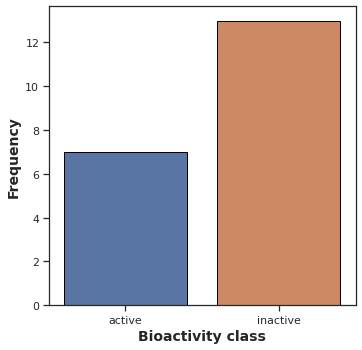

In [66]:
#Verifying the frequencies 
plt.figure(figsize=(5.5, 5.5))


sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


### **MW versus LogP**


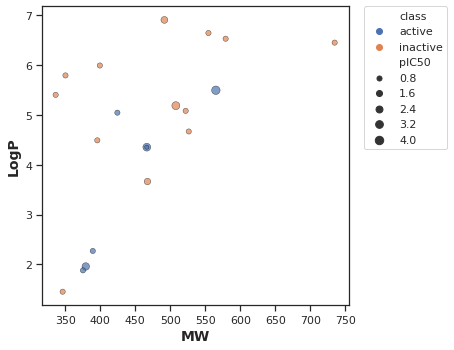

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

**Box plots**

**pIC50**

Text(0, 0.5, 'pIC50 value')

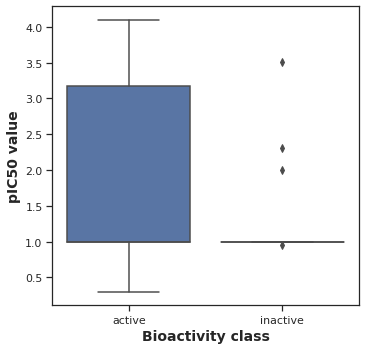

In [70]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

In [79]:
#Apply a non-parametrical 
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu
# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [80]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,37.5,0.251172,0.05,Same distribution (fail to reject H0)


Text(0, 0.5, 'MW')

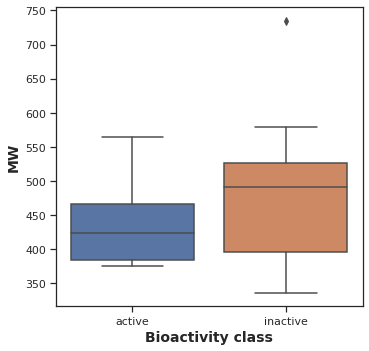

In [82]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW',data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

In [83]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,35.0,0.213968,0.05,Same distribution (fail to reject H0)


Text(0, 0.5, 'LogP')

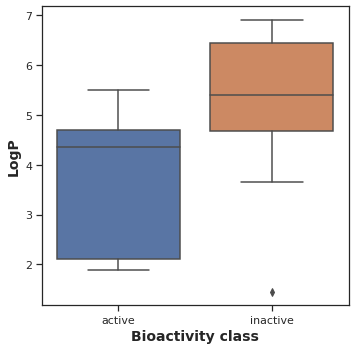

In [85]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

In [86]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,18.0,0.016163,0.05,Different distribution (reject H0)


In [87]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,23.5,0.040443,0.05,Different distribution (reject H0)


In [88]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,40.0,0.3439,0.05,Same distribution (fail to reject H0)


*From the  Linpinski descriptors we get that only LogP and NumHDonors are relevant characteristics*

### **Calculting Descriptors**
In this case the [PaDel](https://www.researchgate.net/publication/50598672_PaDEL-Descriptor_An_Open_Source_Software_to_Calculate_Molecular_Descriptors_and_Fingerprints) descriptors will be used, since they are one of the easiest paths for getting the fingerprints of the molecules.

In [89]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-07-05 16:17:04--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-07-05 16:17:04--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-07-05 16:17:05 (166 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-07-05 16:17:05--  https://github

In [90]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [92]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL318804,COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc...,active,565.099,5.49788,1.0,10.0,4.096910
1,CHEMBL363648,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,inactive,399.519,5.99522,1.0,4.0,1.000000
2,CHEMBL259060,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,inactive,526.408,4.66940,0.0,6.0,0.958607
3,CHEMBL516640,COc1ccc(-n2cnc3ccc(-c4nnc(SCc5cccc(C#N)c5)o4)c...,intermediate,439.500,5.24808,0.0,8.0,1.091515
4,CHEMBL574588,Cc1ccc(-c2ccc3occ(-c4ccc([S@+](C)[O-])cc4)c3c2)o1,inactive,336.412,5.40562,0.0,3.0,1.000000
5,CHEMBL574613,CC[S@+]([O-])c1ccc(-c2coc3ccc(-c4ccc(C)o4)cc23...,inactive,350.439,5.79572,0.0,3.0,1.000000
7,CHEMBL1614725,CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F...,inactive,522.034,5.08380,3.0,9.0,1.000000
8,CHEMBL2048912,CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc...,inactive,734.684,6.45512,3.0,10.0,1.000000
9,CHEMBL2148053,CC(C)(C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(Cl)c4)...,inactive,579.057,6.53348,2.0,8.0,1.000000
10,CHEMBL2204532,CN(c1ccc(F)c(NC(=O)c2cccc(OC(C)(C)C#N)c2Cl)c1)...,inactive,346.416,1.45030,2.0,7.0,1.000000


In [93]:
df_final.to_csv('bioactivity_data_3class_pIC50.csv')

In [94]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_final[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [95]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [96]:
! bash padel.sh

Processing CHEMBL363648 in molecule.smi (2/21). 
Processing CHEMBL318804 in molecule.smi (1/21). 
Processing CHEMBL259060 in molecule.smi (3/21). Average speed: 2.63 s/mol.
Processing CHEMBL516640 in molecule.smi (4/21). Average speed: 1.37 s/mol.
Processing CHEMBL574588 in molecule.smi (5/21). Average speed: 1.29 s/mol.
Processing CHEMBL574613 in molecule.smi (6/21). Average speed: 1.03 s/mol.
Processing CHEMBL2048912 in molecule.smi (8/21). Average speed: 0.80 s/mol.
Processing CHEMBL1614725 in molecule.smi (7/21). Average speed: 0.96 s/mol.
Processing CHEMBL2148053 in molecule.smi (9/21). Average speed: 0.79 s/mol.
Processing CHEMBL2205766 in molecule.smi (11/21). Average speed: 0.69 s/mol.
Processing CHEMBL2204532 in molecule.smi (10/21). Average speed: 0.70 s/mol.
Processing CHEMBL2205637 in molecule.smi (12/21). Average speed: 0.72 s/mol.
Processing CHEMBL2216826 in molecule.smi (13/21). Average speed: 0.59 s/mol.
Processing CHEMBL2348417 in molecule.smi (14/21). Average speed: 0

**Preparing the X and Y Data Matrices**


In [97]:
df_final_X = pd.read_csv('/content/descriptors_output.csv')

In [98]:
df_final_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL363648,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL318804,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL516640,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL259060,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL574588,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CHEMBL574613,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHEMBL2048912,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CHEMBL1614725,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CHEMBL2148053,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,CHEMBL2205766,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_final_Y = df_final.pIC50

In [101]:
dataset = pd.concat([df_final_X, df_final_Y], axis =1)

In [102]:
dataset.to_csv('MKE_bioactivity_data_3class_pIC50_pubchem.csv')